In [1]:
#Deutsch-Jozsa algorithm
%matplotlib inline
from qiskit import *

In [2]:
N = 4  # defining how many qubits will be used

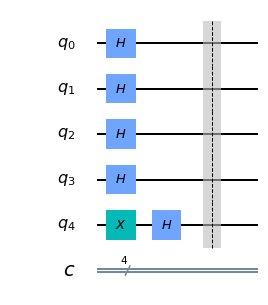

In [6]:
# Step 0: Prepare superposition state
prep_circuit = QuantumCircuit(N + 1, N)
prep_circuit.x(N)  # working qubit starts with |1>
prep_circuit.h(range(N+1))  # Generate all superpositions
prep_circuit.barrier()
prep_circuit.draw(output="mpl")

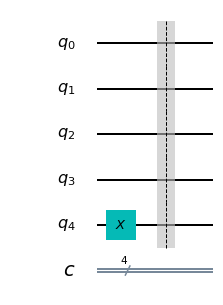

In [7]:
# Step 1: Send input to blackbox 
# Here, we will experiment with 3 blackboxes
# The first is the constant function f(x) = 1
constant_circuit = QuantumCircuit(N+1, N)
constant_circuit.x(N)
constant_circuit.barrier()
constant_circuit.draw(output="mpl")

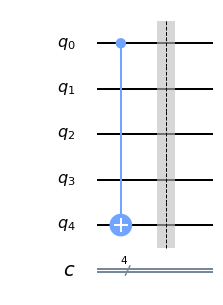

In [8]:
# The second is blackbox implements f(x) = x mod 2, which is a balanced function
mod2_circuit = QuantumCircuit(N+1, N)
mod2_circuit.cx(0, N)
mod2_circuit.barrier()
mod2_circuit.draw(output="mpl")

In [9]:
# The third circuit implements a function that has period 4 and has values {1, 0, 0, 1}
# Before, we code the circuit, here is the representation
def blackbox_3(x):
    if x % 4 == 0 or x % 4 == 3:
        return 1
    else:
        return 0

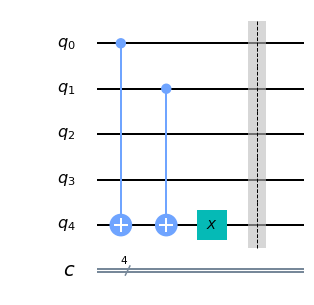

In [10]:
periodic_circuit = QuantumCircuit(N+1, N)
periodic_circuit.cx(0, N)
periodic_circuit.cx(1, N)
periodic_circuit.x(N)
periodic_circuit.barrier()
periodic_circuit.draw(output="mpl")

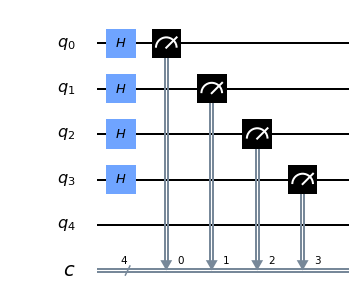

In [11]:
# Step 2: Apply Hadamard to all qubits and measure
measure_circuit = QuantumCircuit(N+1, N)
measure_circuit.h(range(N))
measure_circuit.measure(range(N), range(N))
measure_circuit.draw(output="mpl")

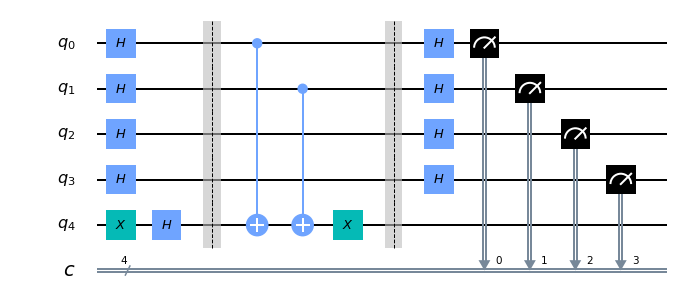

In [12]:
# An example of what the assembled circuit looks like
(prep_circuit + periodic_circuit + measure_circuit).draw(output="mpl")

In [13]:
# Now we simulate for each function, to do so we create an auxiliary function that runs it
def simulate_circuit(prep, blackbox, measuring):
    """Returns the counts of the circuit that is combination of the three circuits"""
    circuit = prep + blackbox + measuring
    simulator = Aer.get_backend("qasm_simulator")
    job = execute(circuit, simulator, shots = 2**16)
    result = job.result()
    count = result.get_counts()
    return count

In [14]:
# Recall that all the measurements are 0 if f is constant, and at least one measurement is 1 if f is balanced

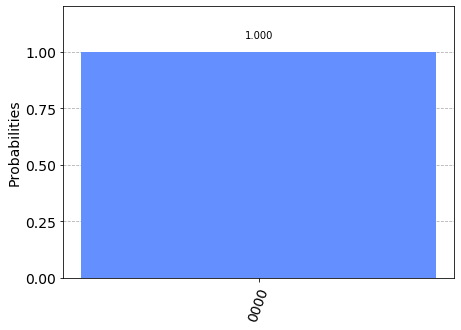

In [15]:
# For a constant function, we expect it to be all 0s
count_constant = simulate_circuit(prep_circuit, constant_circuit, measure_circuit)
visualization.plot_histogram(count_constant)

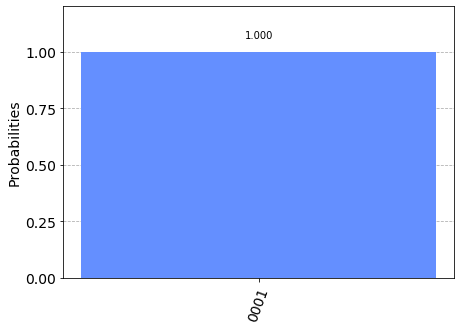

In [16]:
# For balanced, we expect at least one measurement to be 1
count_mod2 = simulate_circuit(prep_circuit, mod2_circuit, measure_circuit)
visualization.plot_histogram(count_mod2)

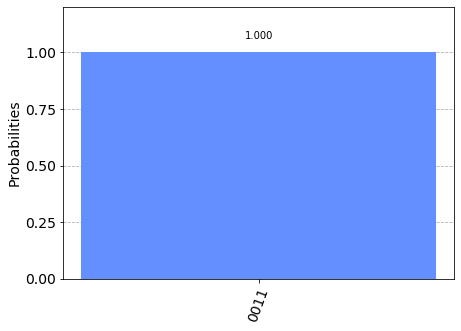

In [17]:
# We try again with a balanced function to verify that at least one is zero
count_periodic = simulate_circuit(prep_circuit, periodic_circuit, measure_circuit)
visualization.plot_histogram(count_periodic)

In [18]:
# The results match our predictions!
# For purposes of reproducibility, the Qiskit version is
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}